In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('E:\CCBT-Term3\DataMining\ML-practice\Datasets\diabetes.csv',sep = ';')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,NaN,148.0,72.0,35.0,0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94,28.1,0.167,21.0,0
4,0.0,NaN,40.0,35.0,168,43.1,2.288,NaN,1


# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               731 non-null    float64
 1   Glucose                   730 non-null    float64
 2   BloodPressure             734 non-null    float64
 3   SkinThickness             734 non-null    float64
 4   Insulin                   717 non-null    object 
 5   BMI                       733 non-null    float64
 6   DiabetesPedigreeFunction  728 non-null    float64
 7   Age                       717 non-null    float64
 8   Outcome                   768 non-null    object 
dtypes: float64(7), object(2)
memory usage: 54.1+ KB


From the above data we can see that the columns Insulin and Outcome are of object data type. Lets see the type of values present in those two columns.

In [5]:
df.value_counts('Insulin')

Insulin
Zero    346
105      11
140       8
130       8
94        7
       ... 
370       1
579       1
235       1
237       1
29        1
Length: 182, dtype: int64

We can see that Insulin column has a value 'Zero' occurring 346 times in the column. As this this type of values could be problematic Lets convert 'Zero' to '0'

In [6]:
df['Insulin'].replace('Zero',0,inplace=True)
df.value_counts('Insulin')

Insulin
0      346
105     11
130      8
140      8
94       7
      ... 
245      1
249      1
25       1
250      1
191      1
Length: 182, dtype: int64

In [7]:
df['Insulin']=pd.to_numeric(df['Insulin'])

In [8]:
df.value_counts('Outcome')

Outcome
0    339
1    177
N    161
Y     91
dtype: int64

Since 'Y' and 'N' are string replacing Y with 1 and N with 0 

In [9]:
df['Outcome'].replace('N',0,inplace=True)
df['Outcome'].replace('Y',1,inplace=True)

In [10]:
df.value_counts('Outcome')

Outcome
0    339
1    177
0    161
1     91
dtype: int64

In [11]:
df['Outcome']=pd.to_numeric(df['Outcome'])

In [12]:
# Checking for no. of missing values in each column

df.isnull().sum()

Pregnancies                 37
Glucose                     38
BloodPressure               34
SkinThickness               34
Insulin                     51
BMI                         35
DiabetesPedigreeFunction    40
Age                         51
Outcome                      0
dtype: int64

In [13]:
#Replacing missing values with mean.
df.fillna(df.mean(), inplace=True)

In [14]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

C:\Program Files (x86)\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


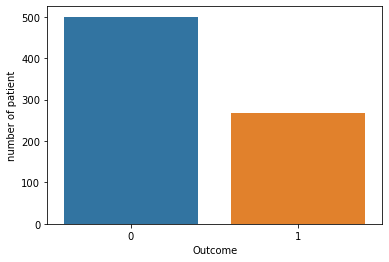

In [15]:
sns.countplot(df.Outcome)
plt.xlabel('Outcome')
plt.ylabel('number of patient')
plt.show()

This shows that the Outcome column has discrete data i.e., Outcome is patient is diabetic or not.

In [16]:
features = df.columns.tolist()

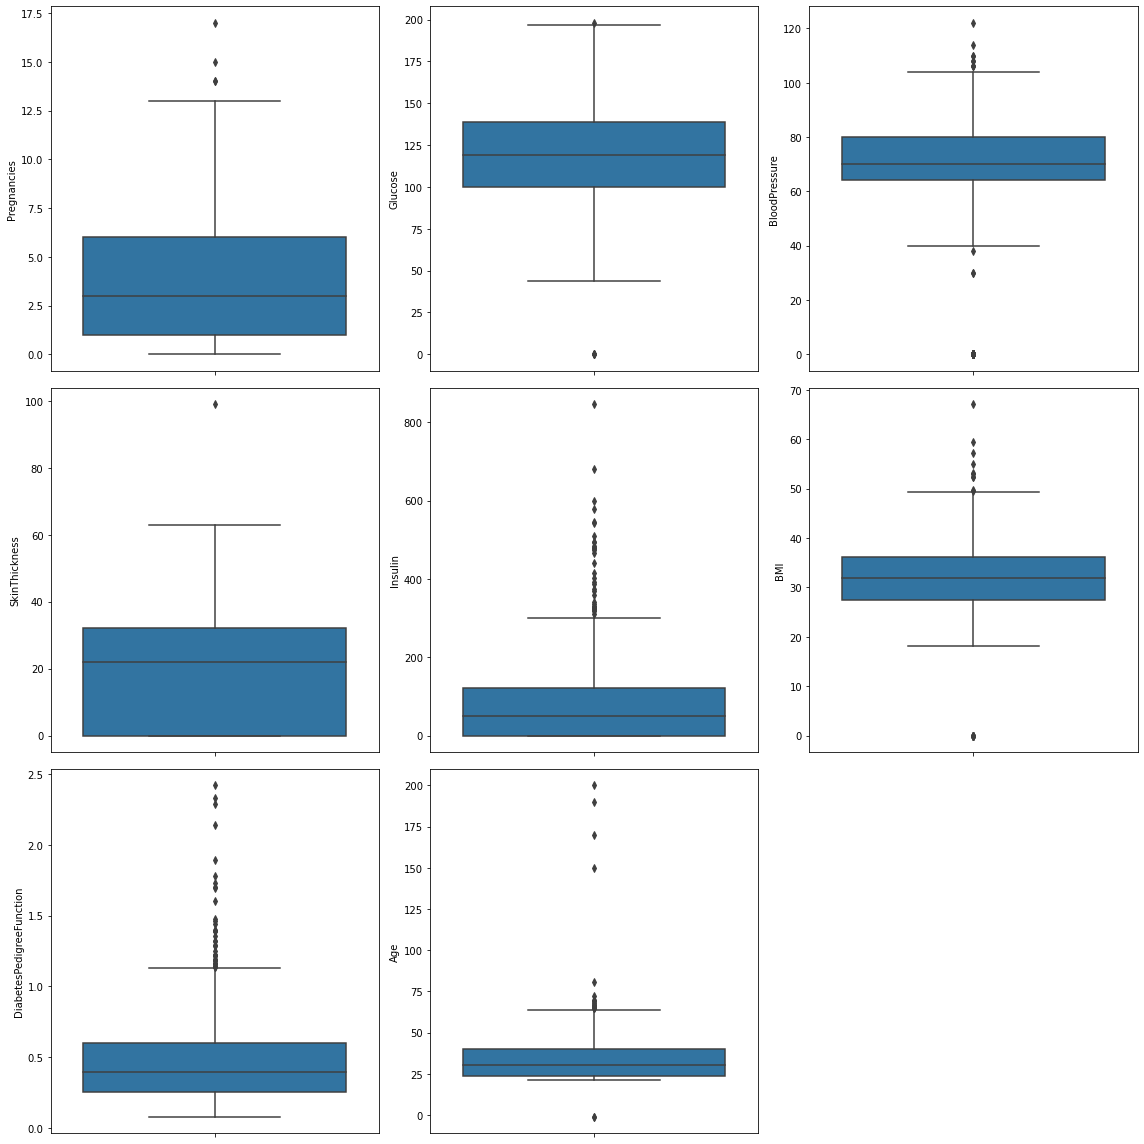

In [68]:
#Box plot for checking outliers
plt.figure(figsize=(16,16))

for i,col in enumerate(features):    
    plt.subplot(3,3,i + 1)
    sns.boxplot(y=col, data=df)
    #plt.ylabel('')

plt.tight_layout()

plt.show()

In [18]:
#lets now consider X is input and y is output
y = df['Outcome']
X = df.copy().drop('Outcome', axis = 1)
features = X.columns.tolist()

In [19]:
print(X.shape,y.shape)

(768, 8) (768,)


In [20]:
#measuring number of ouliers per column and printing them
def IQR_Outliers (X, features):

    print('# of features: ', len(features))
    print('Features: ', features)

    indices = [x for x in X.index]
    #print(indices)
    print('Number of samples: ', len(indices))
    
    out_indexlist = []
        
    for col in features:
       
        #Using nanpercentile instead of percentile because of nan values
        Q1 = np.nanpercentile(X[col], 25.)
        Q3 = np.nanpercentile(X[col], 75.)
        
        cut_off = (Q3 - Q1) * 1.5
        upper, lower = Q3 + cut_off, Q1 - cut_off
        print ('\nFeature: ', col)
        print ('Upper and Lower limits: ', upper, lower)
                
        outliers_index = X[col][(X[col] < lower) | (X[col] > upper)].index.tolist()
        outliers = X[col][(X[col] < lower) | (X[col] > upper)].values
        print('Number of outliers: ', len(outliers))
        print('Outliers Index: ', outliers_index)
        print('Outliers: ', outliers)
        
        out_indexlist.extend(outliers_index)
        
    #using set to remove duplicates
    out_indexlist = list(set(out_indexlist))
    out_indexlist.sort()
    print('\nNumber of rows with outliers: ', len(out_indexlist))
    print('List of rows with outliers: ', out_indexlist)
    
    
IQR_Outliers(X, features)

# of features:  8
Features:  ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Number of samples:  768

Feature:  Pregnancies
Upper and Lower limits:  13.5 -6.5
Number of outliers:  4
Outliers Index:  [88, 159, 298, 455]
Outliers:  [15. 17. 14. 14.]

Feature:  Glucose
Upper and Lower limits:  197.5 41.5
Number of outliers:  5
Outliers Index:  [75, 182, 342, 502, 561]
Outliers:  [  0.   0.   0.   0. 198.]

Feature:  BloodPressure
Upper and Lower limits:  104.0 40.0
Number of outliers:  47
Outliers Index:  [7, 15, 18, 43, 49, 60, 78, 81, 84, 106, 125, 172, 177, 193, 222, 261, 266, 269, 300, 332, 336, 347, 357, 362, 426, 430, 435, 453, 468, 484, 494, 522, 533, 535, 589, 599, 601, 604, 619, 643, 658, 662, 672, 691, 697, 703, 706]
Outliers:  [  0.   0.  30. 110.   0.   0.   0.   0. 108. 122.  30.   0. 110.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0. 108.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.  38.   0.  

There are alot of outliers in each column and 151 rows out of 768rows are outliers. Dealing with outliers might be risk of loosing some important data. Lets try to train the model without removing the outliers

Text(0.5, 1.0, 'Correlation Heatmap')

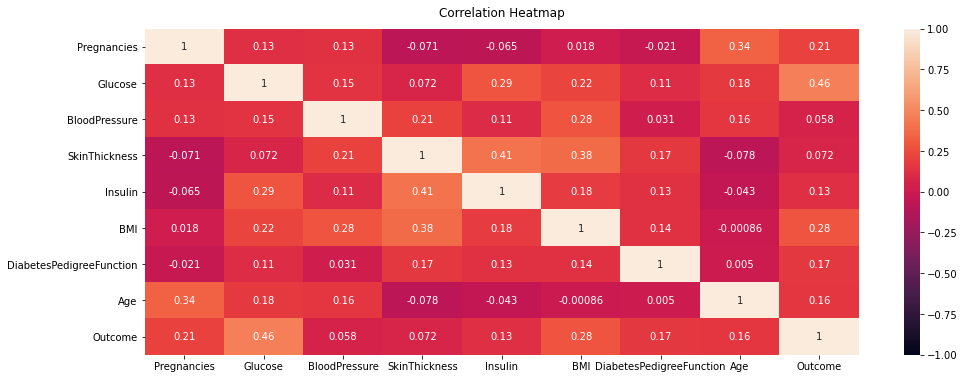

In [21]:
#checking for correlation using heatmap
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

We can see that none of the columns are correlated that means each column has an unique characteristic.

In [22]:
#Scaling the data in X and scaling for Y is not required as it is a categorical data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(X),columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                    'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [23]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.000000,0.867251,0.157079,0.912354,-0.729216,0.209609,0.478090,1.020994
1,-0.859942,-1.167796,-0.157938,0.525524,-0.729216,-0.695850,-0.377091,-0.199736
2,1.270965,1.997833,-0.262943,-1.344157,-0.729216,-1.122709,0.617522,-0.135487
3,-0.859942,-1.038587,-0.157938,0.138693,0.127673,-0.501823,-0.947212,-0.842226
4,-1.164358,0.000000,-1.523010,0.912354,0.802244,1.438446,5.624671,0.000000


In [24]:
#Splitting Train and Test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

# KNN Classification

In [25]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [28]:
for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    print("For k=",i,"Score is", knn.score(X_test,y_test))

For k= 1 Score is 0.67578125
For k= 2 Score is 0.6953125
For k= 3 Score is 0.71484375
For k= 4 Score is 0.71484375
For k= 5 Score is 0.7578125
For k= 6 Score is 0.7421875
For k= 7 Score is 0.73828125
For k= 8 Score is 0.76171875
For k= 9 Score is 0.7734375
For k= 10 Score is 0.77734375
For k= 11 Score is 0.78125
For k= 12 Score is 0.76171875
For k= 13 Score is 0.7734375
For k= 14 Score is 0.75


For K=11 the score is max i.e., 0.78125

In [69]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.78125


0.78125

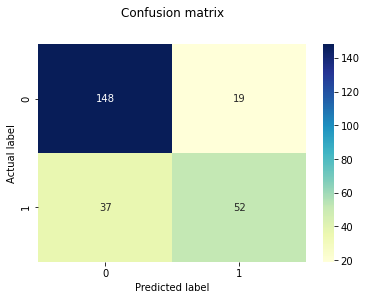

In [32]:
from sklearn import metrics
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
p = sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       167
           1       0.75      0.54      0.63        89

    accuracy                           0.78       256
   macro avg       0.77      0.72      0.73       256
weighted avg       0.77      0.78      0.77       256



In [33]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,15)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7552245140480435
Best Parameters: {'n_neighbors': 13}


In [35]:
knn = KNeighborsClassifier(13)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7734375

# XGBoost

In [49]:
#lets now consider X is input and y is output
y = df['Outcome']
X = df.copy().drop('Outcome', axis = 1)
features = X.columns.tolist()

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [71]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


# Hyper Parameter Optimization using Random Search

In [72]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost
classifier=xgboost.XGBClassifier()

In [73]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [74]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [75]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    2.3s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.4s finished
C:\Users\srihi\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:54:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [76]:
print("Best Score:" + str(random_search.best_score_))
print("Best Parameters: " + str(random_search.best_params_))
print("Best Estimator: " +str(random_search.best_estimator_))

Best Score:0.8134984529014379
Best Parameters: {'min_child_weight': 5, 'max_depth': 15, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 0.7}
Best Estimator: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=15,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [78]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# K-Fold Validation

In [79]:
score=cross_val_score(classifier,X,y,cv=10)

C:\Users\srihi\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\srihi\AppData\Roaming\Python\Python38\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[17:55:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:55:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:55:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:55:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [80]:
score

array([0.68831169, 0.77922078, 0.79220779, 0.68831169, 0.71428571,
       0.81818182, 0.79220779, 0.81818182, 0.73684211, 0.78947368])

In [81]:
score.mean()

0.7617224880382776